In [1]:
# Measurement in cm
# Horizontal
hip = 98


# Vertical
waisttocrotch = 23 # from waist to crotch

shortlength = 50

woffset = 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from math import *
from lmfit import Model
import numpy as np


# Calculate intersection coordinate
# e.g., line_intersection([H,I],[J,K])
# Code from https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return [x, y]


# Retrieve variable name
# Code from https://stackoverflow.com/questions/18425225/getting-the-name-of-a-variable-as-a-string
import inspect
def retrieve_name(var):
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names         

# Polynomial fit
def ccurve(list): # list of points to fit
    ccurvex = [i[0] for i in list]
    ccurvey = [i[1] for i in list]
    def quadratic(x,x0,y0,a,b):
        return a*(x-x0)**b+y0
    model_quad = Model(quadratic)
    params = model_quad.make_params()
    params.add('x0',value=min(ccurvex),vary=False)
    params.add('y0',value=min(ccurvey),vary=False)
    params.add('a',value=1)
    params.add('b',value=2)
    fitres = model_quad.fit(ccurvey,params=params,x=ccurvex)
    v = np.linspace(ccurvex[0],ccurvex[-1],200)
    return [v,model_quad.eval(fitres.params,x=v)]

def ccurveneg(list): # list of points to fit, negative slope
    ccurvex = [-1*i[0] for i in list]
    ccurvey = [i[1] for i in list]
    def quadratic(x,x0,y0,a,b):
        return a*(x-x0)**b+y0
    model_quad = Model(quadratic)
    params = model_quad.make_params()
    params.add('x0',value=min(ccurvex),vary=False)
    params.add('y0',value=min(ccurvey),vary=False)
    params.add('a',value=0.5)
    params.add('b',value=2)
    fitres = model_quad.fit(ccurvey,params=params,x=ccurvex)
    v = np.linspace(ccurvex[0],ccurvex[-1],200)
    return [-1*v,model_quad.eval(fitres.params,x=v)]

def hcurve(list): # list of points to fit
    ccurvex = [i[0] for i in list]
    ccurvey = [i[1] for i in list]
    def quadratic(x,x0,y0,a,b):
        return a*(x-x0)**b+y0
    model_quad = Model(quadratic)
    params = model_quad.make_params()
    params.add('x0',value=min(ccurvex),vary=False)
    params.add('y0',value=max(ccurvey),vary=False)
    params.add('a',value=-1)
    params.add('b',value=2)
    fitres = model_quad.fit(ccurvey,params=params,x=ccurvex)
    v = np.linspace(ccurvex[0],ccurvex[-1],200)
    return [v,model_quad.eval(fitres.params,x=v)]

# Linear interpolation
def linin(list): # input list, two point for output
    ccurvex = [i[0] for i in list]
    ccurvey = [i[1] for i in list]
    def linear(x,a,b):
        return a*x+b
    model_lin = Model(linear)
    params = model_lin.make_params()
    params.add('a',value=1)
    params.add('b',value=1)
    fitres = model_lin.fit(ccurvey,params=params,x=ccurvex)
    v = np.linspace(ccurvex[0],ccurvex[-1],200)
    return [v,model_lin.eval(fitres.params,x=v)]

# Linear extrapolation
def linex(list,xout): # input list, two point for output
    ccurvex = [i[0] for i in list]
    ccurvey = [i[1] for i in list]
    def linear(x,a,b):
        return a*x+b
    model_lin = Model(linear)
    params = model_lin.make_params()
    params.add('a',value=1)
    params.add('b',value=1)
    fitres = model_lin.fit(ccurvey,params=params,x=ccurvex)
    v = np.linspace(xout[0],xout[1],200)
    return [v,model_lin.eval(fitres.params,x=v)]

# Rotate line
# code from https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
def rotate(origin, list, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    """
    ox, oy = origin
    qx = []
    qy = []
    for point in zip(list[0],list[1]):
        px, py = point
        qx.append(ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy))
        qy.append(oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy))
    return [qx, qy]

# Calculate angle
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return (ang1 - ang2) % (2 * np.pi)

# Euclidian distance
def distance(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def lineplot(A,B,color='r',linestyle='-'):
    return ax.plot([A[0],B[0]],[A[1],B[1]], color=color, linestyle=linestyle, linewidth=5)

def dashplot(A,B,color='grey',linestyle='--'):
    return ax.plot([A[0],B[0]],[A[1],B[1]], color=color, linestyle=linestyle, linewidth=5)

def dummysquare(X=[0,0]): #input top left corner coordinate
    A = [X[0],X[1]]
    B = [X[0]+2,X[1]]
    C = [X[0]+2,X[1]+2]
    D = [X[0],X[1]+2]
    lineplot(A,B)
    lineplot(B,C)
    lineplot(C,D)
    lineplot(D,A)
    ax.text(B[0]+1, B[1]+0.5, '2cm',horizontalalignment='left',fontsize=35)
    ax.text(D[0]-0.5, D[1]-4, '2cm',horizontalalignment='left',fontsize=35)
    return

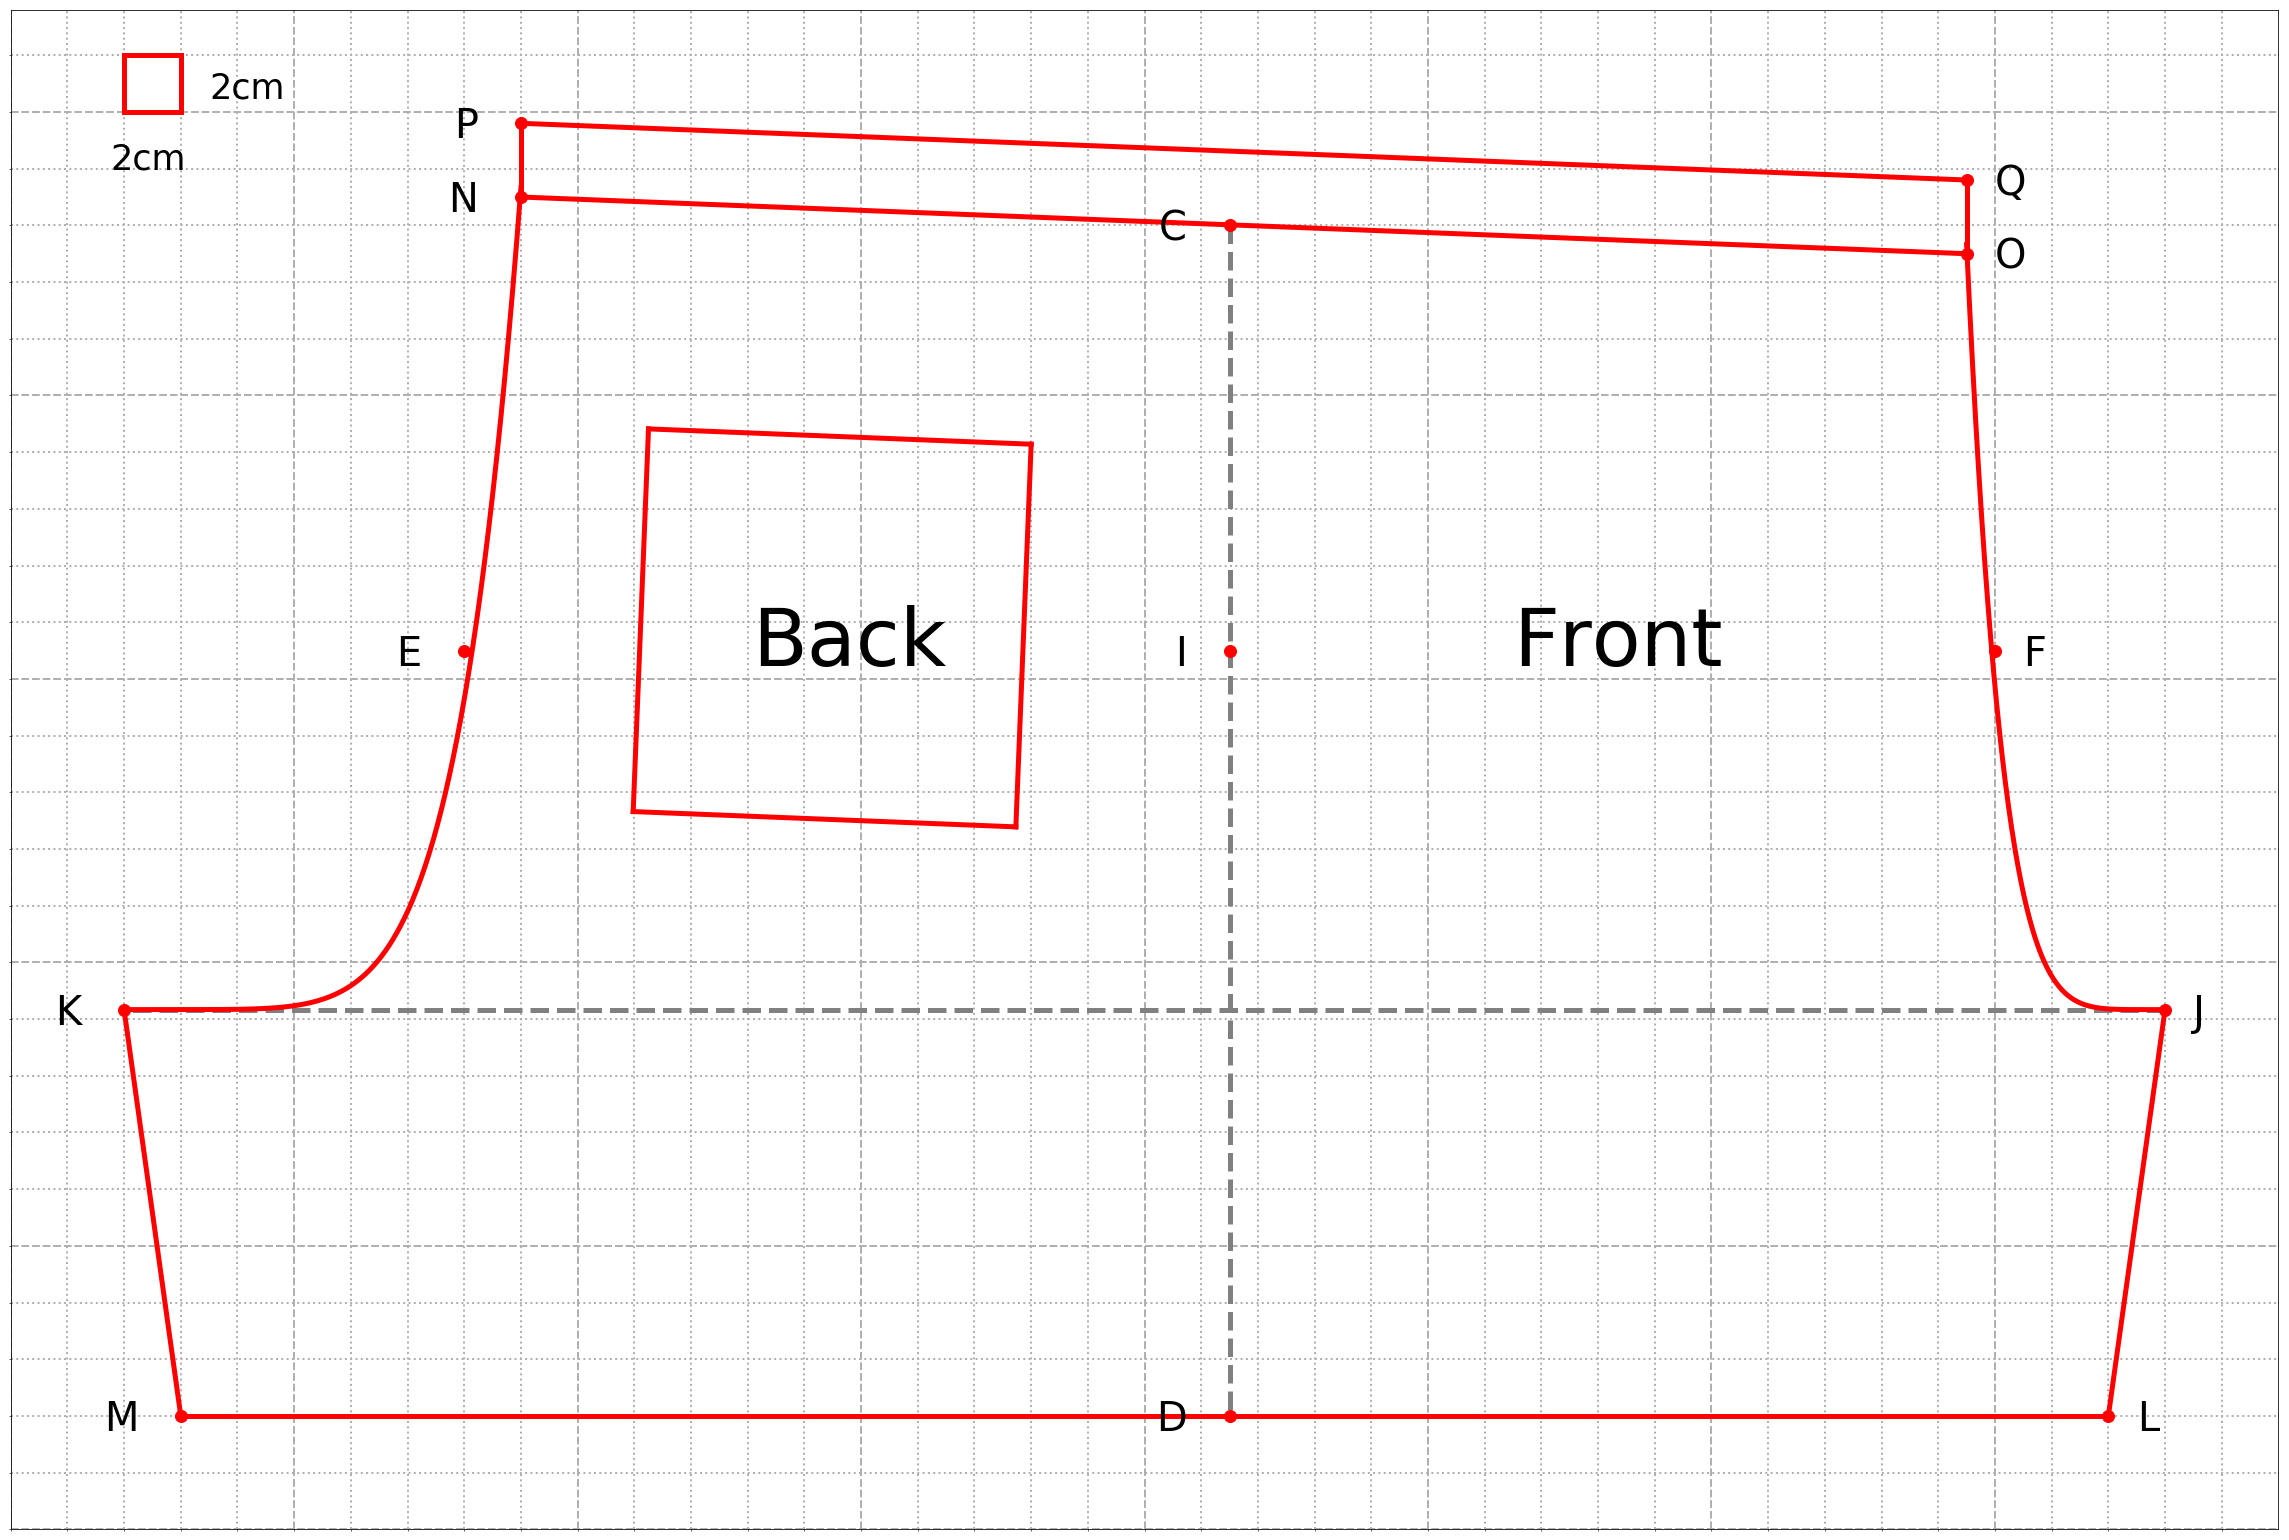

In [3]:
woffset = 0.75
wcoffset = 0.5 # waist curve offset
uhoffset = 3.5 # upper hip offset for looseness between 3 to 5 cm
hoffset = 5 # hip offset for looseness between 3 to 5 cm
ttoffset = 6 # top thigh offset for end of legs looseness between 5 to 7 cm
beoloffset = 2 # end off leg offset for back piece, typically 2 cm

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 156}

matplotlib.rc('font', **font)

init = [15,-8]
A = [init[0], init[1]]
B = [init[0]+(hip+10)/2, init[1]]
C = [(A[0]+B[0])/2, init[1]]
D = [C[0], -1*shortlength]
E = [A[0], -1*waisttocrotch]
F = [B[0], -1*waisttocrotch]
H = [A[0], -1*(hip/3)-3]
G = [B[0], -1*(hip/3)-3]

I = line_intersection([E,F],[C,D])
J = [G[0]+(distance(F,I)/3-3),G[1]]
K = [H[0]-(distance(F,I)/3+3),H[1]]

Gp = [G[0]+2.5/2,G[1]+2.5/2]
Hp = [H[0]-3.5/2,H[1]+3.5/2]

L = [J[0]-2,D[1]]
M = [K[0]+2,D[1]]

N = [A[0]+2,A[1]+1]
O = [B[0]-1,B[1]-1]

P = [N[0],N[1]+2.6]
Q = [O[0],O[1]+2.6]

# Rear bag
R = [N[0],N[1]-8]
S = [C[0], C[1]-8]
T = [R[0], R[1]-14]
U = [S[0], S[1]-14]

# Calculate figure size
allpoints = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q]
xmin = min([i[0] for i in allpoints])-4
xmax = max([i[0] for i in allpoints])+4
ymin = min([i[1] for i in allpoints])-4
ymax = max([i[1] for i in allpoints])+4
# print('xmin', xmin)
# print('xmax', xmax)
# print('ymin', ymin)
# print('ymax', ymax)


fig, ax = plt.subplots(1, 1, figsize=(abs(xmax-xmin)/2.54,abs(ymax-ymin)/2.54),frameon=False)

# print('fig size:',(abs(xmax-xmin),abs(ymax-ymin)))
dummysquare([3,-4])

dashplot(C,D)
dashplot(J,K)

# Front Crotch curve
# list = [F,Gp,J]
list = [O,F,Gp,J]
# print(list)
fcc = ccurveneg(list)
ax.plot(fcc[0],fcc[1],'-', label='fit', color = 'r', linewidth=5)

# Back Crotch curve
list = [K,Hp,E,N]
bcc = ccurve(list)
ax.plot(bcc[0],bcc[1],'-', label='fit', color = 'r', linewidth=5)

lineplot(K,M)
lineplot(J,L)
lineplot(L,M)
lineplot(N,O)
lineplot(P,Q)
lineplot(P,N)
lineplot(Q,O)

#Rear bag
rbt = linex([R,S],[R[0]+4.5,R[0]+4.5+13.5]) #top
ax.plot(rbt[0],rbt[1],'-', label='fit', color = 'r', linewidth=5)

rbl = rotate([rbt[0][0],rbt[1][0]],rbt,-pi/2) #left
ax.plot(rbl[0],rbl[1],'-', label='fit', color = 'r', linewidth=5)

rbr = [[i-rbl[0][0]+rbt[0][-1] for i in rbl[0]],[i-rbl[1][0]+rbt[1][-1] for i in rbl[1]]] #right
ax.plot(rbr[0],rbr[1],'-', label='fit', color = 'r', linewidth=5)

rbb = [[i-rbt[0][0]+rbl[0][-1] for i in rbt[0]],[i-rbt[1][0]+rbl[1][-1] for i in rbt[1]]] #bottom
ax.plot(rbb[0],rbb[1],'-', label='fit', color = 'r', linewidth=5)

# Front points
for point in [C,D,E,I,K,M,N,P]:
    ax.plot(point[0],point[1],'or', markersize=12)
    ax.text(point[0]-1.5, point[1]-0.5, retrieve_name(point)[0],fontsize=40,horizontalalignment='right')
for point in [O,Q,F,J,L]:
    ax.plot(point[0],point[1],'or', markersize=12)
    ax.text(point[0]+1, point[1]-0.5, retrieve_name(point)[0],fontsize=40,horizontalalignment='left')
    
ax.text(I[0]-10, I[1]-0.5, 'Back' ,fontsize=80,horizontalalignment='right')
ax.text(I[0]+10, I[1]-0.5, 'Front' ,fontsize=80,horizontalalignment='left')

ax.axis('scaled')
xmajor_ticks = np.arange(xmin, xmax, 10)
xminor_ticks = np.arange(xmin, xmax, 2)
ymajor_ticks = np.arange(ymin, ymax, 10)
yminor_ticks = np.arange(ymin, ymax, 2)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)
ax.grid(which='minor', alpha=1, linestyle =':', linewidth = 2)
ax.grid(which='major', alpha=1, linestyle ='--', linewidth = 2)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)

for axi in (ax.xaxis, ax.yaxis):
    for tic in axi.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig("test.svg", format="svg", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

Export to PDF with multiple pages

In [194]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
drawing = svg2rlg("test.svg")
renderPDF.drawToFile(drawing, "test.pdf")

In [ ]:
# This doesn't work
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import mm
from reportlab.platypus import *
height, width = A4
doc = SimpleDocTemplate("test.pdf", pagesize=A4)
parts = []
parts.append(Image("test.pdf",width=210*mm-doc.rightMargin-doc.leftMargin, 
                   height=293*mm-doc.topMargin-doc.bottomMargin))
doc.build(parts)

In [41]:
# fpdf doesn'e support svg file
from fpdf import FPDF
# pages are in A4 portrait and the measure unit is millimeter.
pdf = FPDF('P', 'mm', 'A4') # P=portrait
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.set_margins(left=0, top=0, right=0)
pdf.cell(20, 10,'Hello World!', border = 1)
pdf.cell(100, 50, 'Powered by FPDF.', border = 1)
pdf.image('test.svg')
pdf.output('tuto1.pdf', 'F')

RuntimeError: FPDF error: Unsupported image type: svg